# Import Modules and Data

In [1]:
# Load modules
import sys
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
from notify_run import Notify
notify = Notify()
notify.register()

Endpoint: https://notify.run/UefDopOIh61y5Fyr
To subscribe, open: https://notify.run/c/UefDopOIh61y5Fyr
Or scan this QR code:

                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              

In [3]:
# Load custom functions
sys.path.append('C:\\Users\\Dylan\\Desktop\\Data Science\\Projects\\DistractedDrivers\\functions')
from ddfuncs import trainsampling, cvrand

In [4]:
# Set memory limit on GPU to keep it from freezing up when fitting TensorFlow models later
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 3 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0], \
                                                                [tf.config.experimental.\
                                                                 VirtualDeviceConfiguration\
                                                                 (memory_limit=1024 * 3)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [5]:
# Load processed training data
os.chdir('../data/processed')
df = pd.read_csv('driver_image_list_processed.csv')

In [6]:
df = trainsampling(df, samples=80, random_state=42)

In [7]:
df

,subject,classname,img,imgpath
51,p002,c0,img_13073.jpg,imgs/train/c0/img_13073.jpg
14,p002,c0,img_5585.jpg,imgs/train/c0/img_5585.jpg
71,p002,c0,img_48187.jpg,imgs/train/c0/img_48187.jpg
60,p002,c0,img_98115.jpg,imgs/train/c0/img_98115.jpg
20,p002,c0,img_66355.jpg,imgs/train/c0/img_66355.jpg
...,...,...,...,...
22364,p081,c9,img_95966.jpg,imgs/train/c9/img_95966.jpg
22404,p081,c9,img_18412.jpg,imgs/train/c9/img_18412.jpg
22415,p081,c9,img_23818.jpg,imgs/train/c9/img_23818.jpg
22358,p081,c9,img_54961.jpg,imgs/train/c9/img_54961.jpg


In [8]:
# Change to appropriate directory for data generation
os.chdir('../raw')

# Model 1 - 1 Conv, 1 MaxPool

In [9]:
model1 = Sequential()
model1.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(256, 256, 3)))
model1.add(MaxPool2D(10))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))
opt = Adam(learning_rate=0.0001)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6250)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62510     
Total params: 62,790
Trainable params: 62,790
Non-trainable params: 0
_________________________________________________________________


In [10]:
trdgen = ImageDataGenerator(rescale=1./255)
tedgen = ImageDataGenerator(rescale=1./255)

In [11]:
model1data = cvrand(model1,
                    df,
                    trdgen,
                    tedgen,
                    n_iterations=13,
                    batch_size=16,
                    epochs=50,
                    steps_per_epoch=115,
                    target_size=(256,256),
                    random_state=42,
                    min_delta=0.05,
                    patience=3)

CV iteration 1 of 13
Validation subjects are ['p026' 'p050' 'p002']
Found 18400 validated image filenames belonging to 10 classes.
Found 2400 validated image filenames belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 115 steps, validate for 75 steps
Epoch 1/50
115/115 [==============================] - 31s 266ms/step - loss: 2.2712 - accuracy: 0.1598 - val_loss: 2.3211 - val_accuracy: 0.1175
Epoch 2/50
115/115 [==============================] - 26s 229ms/step - loss: 2.1409 - accuracy: 0.2522 - val_loss: 2.2922 - val_accuracy: 0.1158
Epoch 3/50
115/115 [==============================] - 27s 239ms/step - loss: 1.9534 - accuracy: 0.3875 - val_loss: 2.2661 - val_accuracy: 0.1321
Epoch 4/50
115/115 [==============================] - 27s 231ms/step - loss: 1.7529 - accuracy: 0.4793 - val_loss: 2.2995 - val_accuracy: 0.1904
Epoch 5/50
115/115 [==============================] - 27s 232ms/step - loss: 1.5629 - accuracy: 0.5614 - val_loss: 2.2295 - val_accura

Train for 115 steps, validate for 75 steps
Epoch 1/50
115/115 [==============================] - 25s 217ms/step - loss: 2.2989 - accuracy: 0.1326 - val_loss: 2.2642 - val_accuracy: 0.1371
Epoch 2/50
115/115 [==============================] - 25s 216ms/step - loss: 2.1961 - accuracy: 0.2109 - val_loss: 2.1821 - val_accuracy: 0.2267
Epoch 3/50
115/115 [==============================] - 25s 216ms/step - loss: 2.1069 - accuracy: 0.2870 - val_loss: 2.0891 - val_accuracy: 0.3000
Epoch 4/50
115/115 [==============================] - 25s 217ms/step - loss: 1.9941 - accuracy: 0.3755 - val_loss: 1.9995 - val_accuracy: 0.2683
Epoch 5/50
115/115 [==============================] - 25s 216ms/step - loss: 1.8737 - accuracy: 0.4114 - val_loss: 1.9022 - val_accuracy: 0.3304
Epoch 6/50
115/115 [==============================] - 25s 217ms/step - loss: 1.7668 - accuracy: 0.4772 - val_loss: 1.7685 - val_accuracy: 0.5158
Epoch 7/50
115/115 [==============================] - 25s 217ms/step - loss: 1.6068 - a

In [12]:
model1data

,validation_subjects,train_accuracies,validation_accuracy
0,"[p026, p050, p002]",0.561,0.273
1,"[p052, p039, p024]",0.778,0.662
2,"[p049, p064, p042]",0.281,0.252
3,"[p051, p066, p014]",0.698,0.466
4,"[p021, p045, p056]",0.662,0.483
5,"[p042, p050, p049]",0.307,0.296
6,"[p002, p049, p045]",0.707,0.487
7,"[p061, p012, p041]",0.363,0.302
8,"[p026, p049, p015]",0.592,0.364
9,"[p052, p045, p051]",0.702,0.609


In [39]:
model1data.to_csv('../metrics/model1metrics.csv', index=False)

# Model 2 - Add Dropout layer

In [13]:
model2 = Sequential()
model2.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(256, 256, 3)))
model2.add(Dropout(0.25))
model2.add(MaxPool2D(10))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))
opt = Adam(learning_rate=0.0001)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 10)      280       
_________________________________________________________________
dropout (Dropout)            (None, 254, 254, 10)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6250)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                62510     
Total params: 62,790
Trainable params: 62,790
Non-trainable params: 0
_________________________________________________________________


In [14]:
trdgen = ImageDataGenerator(rescale=1./255)
tedgen = ImageDataGenerator(rescale=1./255)

In [15]:
model2data = cvrand(model2, 
                    df,
                    trdgen,
                    tedgen,
                    n_iterations=30,
                    batch_size=16,
                    epochs=50,
                    steps_per_epoch=125,
                    target_size=(256, 256),
                    random_state=42,
                    min_delta=0.05,
                    patience=3)

CV iteration 1 of 30
Validation subjects are ['p026' 'p050' 'p002']
Found 18400 validated image filenames belonging to 10 classes.
Found 2400 validated image filenames belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 75 steps
Epoch 1/50
125/125 [==============================] - 26s 211ms/step - loss: 2.2612 - accuracy: 0.1695 - val_loss: 2.3255 - val_accuracy: 0.1283
Epoch 2/50
125/125 [==============================] - 26s 208ms/step - loss: 2.0558 - accuracy: 0.2860 - val_loss: 2.2887 - val_accuracy: 0.1425
Epoch 3/50
125/125 [==============================] - 26s 208ms/step - loss: 1.8502 - accuracy: 0.4015 - val_loss: 2.2636 - val_accuracy: 0.1663
Epoch 4/50
125/125 [==============================] - 26s 208ms/step - loss: 1.6384 - accuracy: 0.5070 - val_loss: 2.2852 - val_accuracy: 0.2050
Epoch 5/50
125/125 [==============================] - 26s 207ms/step - loss: 1.4786 - accuracy: 0.5570 - val_loss: 2.2708 - val_accura

125/125 [==============================] - 26s 210ms/step - loss: 1.2710 - accuracy: 0.6485 - val_loss: 1.5041 - val_accuracy: 0.5850
Epoch 9/50
125/125 [==============================] - 26s 208ms/step - loss: 1.1499 - accuracy: 0.7045 - val_loss: 1.4416 - val_accuracy: 0.5046
CV iteration 11 of 30
Validation subjects are ['p045' 'p021' 'p016']
Found 18400 validated image filenames belonging to 10 classes.
Found 2400 validated image filenames belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 75 steps
Epoch 1/50
125/125 [==============================] - 26s 207ms/step - loss: 2.2982 - accuracy: 0.1440 - val_loss: 2.2515 - val_accuracy: 0.1400
Epoch 2/50
125/125 [==============================] - 26s 207ms/step - loss: 2.1282 - accuracy: 0.2655 - val_loss: 2.1722 - val_accuracy: 0.2275
Epoch 3/50
125/125 [==============================] - 26s 209ms/step - loss: 2.0026 - accuracy: 0.3240 - val_loss: 2.0761 - val_accuracy: 0.3575

Epoch 4/50
125/125 [==============================] - 26s 208ms/step - loss: 1.8429 - accuracy: 0.4060 - val_loss: 2.0133 - val_accuracy: 0.2504
Epoch 5/50
125/125 [==============================] - 26s 208ms/step - loss: 1.6968 - accuracy: 0.4720 - val_loss: 1.9239 - val_accuracy: 0.2721
Epoch 6/50
125/125 [==============================] - 26s 208ms/step - loss: 1.5545 - accuracy: 0.5315 - val_loss: 1.8190 - val_accuracy: 0.4608
Epoch 7/50
125/125 [==============================] - 26s 208ms/step - loss: 1.4136 - accuracy: 0.5940 - val_loss: 1.7565 - val_accuracy: 0.3879
Epoch 8/50
125/125 [==============================] - 26s 208ms/step - loss: 1.2798 - accuracy: 0.6530 - val_loss: 1.7091 - val_accuracy: 0.4504
Epoch 9/50
125/125 [==============================] - 26s 208ms/step - loss: 1.1419 - accuracy: 0.6925 - val_loss: 1.6874 - val_accuracy: 0.4017
CV iteration 17 of 30
Validation subjects are ['p016' 'p039' 'p075']
Found 18400 validated image filenames belonging to 10 classes

125/125 [==============================] - 26s 207ms/step - loss: 1.0283 - accuracy: 0.7470 - val_loss: 1.3898 - val_accuracy: 0.5775
Epoch 11/50
125/125 [==============================] - 26s 207ms/step - loss: 0.9364 - accuracy: 0.7730 - val_loss: 1.3212 - val_accuracy: 0.6137
Epoch 12/50
125/125 [==============================] - 26s 207ms/step - loss: 0.8382 - accuracy: 0.8060 - val_loss: 1.3684 - val_accuracy: 0.5267
CV iteration 28 of 30
Validation subjects are ['p049' 'p035' 'p022']
Found 18400 validated image filenames belonging to 10 classes.
Found 2400 validated image filenames belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 75 steps
Epoch 1/50
125/125 [==============================] - 26s 206ms/step - loss: 2.3023 - accuracy: 0.1420 - val_loss: 2.2233 - val_accuracy: 0.1729
Epoch 2/50
125/125 [==============================] - 26s 206ms/step - loss: 2.1482 - accuracy: 0.2230 - val_loss: 2.1557 - val_accuracy: 0.25

In [16]:
model2data

,validation_subjects,train_accuracies,validation_accuracy
0,"[p026, p050, p002]",0.787,0.282
1,"[p052, p039, p024]",0.396,0.427
2,"[p049, p064, p042]",0.596,0.317
3,"[p051, p066, p014]",0.698,0.423
4,"[p021, p045, p056]",0.643,0.504
5,"[p042, p050, p049]",0.718,0.278
6,"[p002, p049, p045]",0.694,0.489
7,"[p061, p012, p041]",0.334,0.351
8,"[p026, p049, p015]",0.256,0.284
9,"[p052, p045, p051]",0.648,0.585


In [40]:
model2data.to_csv('../metrics/model2metrics.csv', index=False)

# Model 3 - Architecture Modeled off AlexNet

In [17]:
model3 = Sequential()
model3.add(Conv2D(99,
                 kernel_size=11,
                 strides=4,
                 padding='valid',
                 activation='relu',
                 input_shape=(227, 227, 3)))
model3.add(MaxPool2D(3,
                    strides=2,
                    padding='valid'))
model3.add(Conv2D(256,
                 kernel_size=5,
                 strides=1,
                 padding='same',
                 activation='relu'))
model3.add(MaxPool2D(3,
                    strides=2,
                    padding='valid'))
model3.add(Conv2D(384,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 activation='relu'))
model3.add(Conv2D(384,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 activation='relu'))
model3.add(Conv2D(256,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 activation='relu'))
model3.add(Flatten())
model3.add(Dense(100, activation='relu'))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(10, activation='softmax'))
opt = Adam(learning_rate=0.00001)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 55, 55, 99)        36036     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 99)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 256)       633856    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 256)      

In [18]:
trdgen = ImageDataGenerator(rescale=1./255)
tedgen = ImageDataGenerator(rescale=1./255)

In [19]:
model3data = cvrand(model3, 
                    df,
                    trdgen,
                    tedgen,
                    n_iterations=30,
                    batch_size=16,
                    epochs=50,
                    steps_per_epoch=125,
                    target_size=(227,227),
                    random_state=42,
                    min_delta=0.05,
                    patience=3)

CV iteration 1 of 30
Validation subjects are ['p026' 'p050' 'p002']
Found 18400 validated image filenames belonging to 10 classes.
Found 2400 validated image filenames belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 75 steps
Epoch 1/50
125/125 [==============================] - 26s 210ms/step - loss: 2.2960 - accuracy: 0.1390 - val_loss: 2.2983 - val_accuracy: 0.1304
Epoch 2/50
125/125 [==============================] - 25s 201ms/step - loss: 2.1958 - accuracy: 0.2115 - val_loss: 2.3497 - val_accuracy: 0.0921
Epoch 3/50
125/125 [==============================] - 25s 200ms/step - loss: 1.8044 - accuracy: 0.3415 - val_loss: 2.4959 - val_accuracy: 0.1267
Epoch 4/50
125/125 [==============================] - 25s 204ms/step - loss: 1.5297 - accuracy: 0.4320 - val_loss: 2.3496 - val_accuracy: 0.2158
Epoch 5/50
125/125 [==============================] - 25s 204ms/step - loss: 1.3608 - accuracy: 0.5045 - val_loss: 2.3028 - val_accura

Epoch 5/50
125/125 [==============================] - 25s 201ms/step - loss: 2.1924 - accuracy: 0.2095 - val_loss: 2.0843 - val_accuracy: 0.2325
Epoch 6/50
125/125 [==============================] - 25s 200ms/step - loss: 1.9390 - accuracy: 0.2985 - val_loss: 1.8787 - val_accuracy: 0.2679
Epoch 7/50
125/125 [==============================] - 25s 200ms/step - loss: 1.6931 - accuracy: 0.3750 - val_loss: 1.8009 - val_accuracy: 0.3742
Epoch 8/50
125/125 [==============================] - 25s 200ms/step - loss: 1.4505 - accuracy: 0.4785 - val_loss: 1.8372 - val_accuracy: 0.3529
Epoch 9/50
125/125 [==============================] - 25s 200ms/step - loss: 1.2339 - accuracy: 0.5550 - val_loss: 1.9796 - val_accuracy: 0.3550
Epoch 10/50
125/125 [==============================] - 26s 204ms/step - loss: 1.0576 - accuracy: 0.6340 - val_loss: 2.2762 - val_accuracy: 0.4604
Epoch 11/50
125/125 [==============================] - 25s 200ms/step - loss: 0.8829 - accuracy: 0.7145 - val_loss: 2.5214 - val_

CV iteration 17 of 30
Validation subjects are ['p016' 'p039' 'p075']
Found 18400 validated image filenames belonging to 10 classes.
Found 2400 validated image filenames belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 75 steps
Epoch 1/50
125/125 [==============================] - 25s 202ms/step - loss: 2.3004 - accuracy: 0.1240 - val_loss: 2.3005 - val_accuracy: 0.1371
Epoch 2/50
125/125 [==============================] - 25s 201ms/step - loss: 2.2982 - accuracy: 0.1435 - val_loss: 2.2980 - val_accuracy: 0.1267
Epoch 3/50
125/125 [==============================] - 25s 200ms/step - loss: 2.2933 - accuracy: 0.1665 - val_loss: 2.2945 - val_accuracy: 0.1625
Epoch 4/50
125/125 [==============================] - 25s 201ms/step - loss: 2.2816 - accuracy: 0.2195 - val_loss: 2.2863 - val_accuracy: 0.1508
CV iteration 18 of 30
Validation subjects are ['p052' 'p075' 'p072']
Found 18400 validated image filenames belonging to 10 classes.
F

125/125 [==============================] - 25s 201ms/step - loss: 2.2983 - accuracy: 0.1220 - val_loss: 2.2991 - val_accuracy: 0.1092
Epoch 3/50
125/125 [==============================] - 25s 200ms/step - loss: 2.2955 - accuracy: 0.1390 - val_loss: 2.2950 - val_accuracy: 0.1158
Epoch 4/50
125/125 [==============================] - 25s 200ms/step - loss: 2.2883 - accuracy: 0.1450 - val_loss: 2.2860 - val_accuracy: 0.1392
CV iteration 30 of 30
Validation subjects are ['p035' 'p081' 'p075']
Found 18400 validated image filenames belonging to 10 classes.
Found 2400 validated image filenames belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 125 steps, validate for 75 steps
Epoch 1/50
125/125 [==============================] - 25s 201ms/step - loss: 2.3010 - accuracy: 0.1165 - val_loss: 2.2985 - val_accuracy: 0.1183
Epoch 2/50
125/125 [==============================] - 25s 201ms/step - loss: 2.2957 - accuracy: 0.1650 - val_loss: 2.2942 - val_accuracy: 0.1612

In [20]:
model3data

,validation_subjects,train_accuracies,validation_accuracy
0,"[p026, p050, p002]",0.668,0.285
1,"[p052, p039, p024]",0.246,0.294
2,"[p049, p064, p042]",0.629,0.441
3,"[p051, p066, p014]",0.144,0.138
4,"[p021, p045, p056]",0.202,0.187
5,"[p042, p050, p049]",0.634,0.460
6,"[p002, p049, p045]",0.198,0.241
7,"[p061, p012, p041]",0.643,0.521
8,"[p026, p049, p015]",0.178,0.194
9,"[p052, p045, p051]",0.107,0.200


In [41]:
model3data.to_csv('../metrics/model3metrics.csv', index=False)

# AlexNet Corrected

In [21]:
model4 = Sequential()
model4.add(Conv2D(99,
                  kernel_size=11,
                  strides=4,
                  padding='valid',
                  input_shape=(227, 227, 3)))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPool2D(3,
                     strides=2,
                     padding='valid'))
model4.add(Conv2D(256,
                  kernel_size=5,
                  strides=1,
                  padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPool2D(3,
                    strides=2,
                    padding='valid'))
model4.add(Conv2D(384,
                  kernel_size=3,
                  strides=1,
                  padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Conv2D(384,
                  kernel_size=3,
                  strides=1,
                  padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Conv2D(256,
                  kernel_size=3,
                  strides=1,
                  padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPool2D(3,
                     strides=2,
                     padding='valid'))
model4.add(Flatten())
model4.add(Dense(4096, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(4096, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))


In [22]:
opt = Adam(learning_rate=0.00001)
model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 55, 55, 99)        36036     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 99)        396       
_________________________________________________________________
activation (Activation)      (None, 55, 55, 99)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 99)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 256)       633856    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 256)      

With a batch size of 16 and training set consisting of 18,400 images, performing 50 epochs of 115 steps will mean that the training data is gone over 5 times. Early stopping callback is set to 10, so if the validation accuracy does not improve 10 times in a row then the training will cease.

In [23]:
trdgen = ImageDataGenerator(rescale=1./255)
tedgen = ImageDataGenerator(rescale=1./255)

In [24]:
model4data = cvrand(model4, 
                    df,
                    trdgen,
                    tedgen,
                    n_iterations=13,
                    batch_size=16,
                    epochs=50,
                    steps_per_epoch=115,
                    target_size=(227,227),
                    random_state=42,
                    min_delta=0.05,
                    patience=5)

CV iteration 1 of 13
Validation subjects are ['p026' 'p050' 'p002']
Found 18400 validated image filenames belonging to 10 classes.
Found 2400 validated image filenames belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 115 steps, validate for 75 steps
Epoch 1/50
115/115 [==============================] - 30s 262ms/step - loss: 3.2027 - accuracy: 0.1408 - val_loss: 2.3582 - val_accuracy: 0.1000
Epoch 2/50
115/115 [==============================] - 29s 249ms/step - loss: 2.3792 - accuracy: 0.2353 - val_loss: 2.3696 - val_accuracy: 0.1008
Epoch 3/50
115/115 [==============================] - 24s 211ms/step - loss: 1.9414 - accuracy: 0.3201 - val_loss: 2.4820 - val_accuracy: 0.0979
Epoch 4/50
115/115 [==============================] - 24s 210ms/step - loss: 1.6719 - accuracy: 0.4364 - val_loss: 2.3349 - val_accuracy: 0.0825
Epoch 5/50
115/115 [==============================] - 29s 249ms/step - loss: 1.4972 - accuracy: 0.4663 - val_loss: 2.2403 - val_accura

Found 18400 validated image filenames belonging to 10 classes.
Found 2400 validated image filenames belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 115 steps, validate for 75 steps
Epoch 1/50
115/115 [==============================] - 24s 211ms/step - loss: 3.2385 - accuracy: 0.1397 - val_loss: 2.3273 - val_accuracy: 0.1000
Epoch 2/50
115/115 [==============================] - 24s 211ms/step - loss: 2.2214 - accuracy: 0.2402 - val_loss: 2.4327 - val_accuracy: 0.1000
Epoch 3/50
115/115 [==============================] - 24s 211ms/step - loss: 1.8644 - accuracy: 0.3576 - val_loss: 2.4432 - val_accuracy: 0.1000
Epoch 4/50
115/115 [==============================] - 24s 211ms/step - loss: 1.6345 - accuracy: 0.4283 - val_loss: 2.2130 - val_accuracy: 0.1079
Epoch 5/50
115/115 [==============================] - 24s 211ms/step - loss: 1.3816 - accuracy: 0.5109 - val_loss: 1.7517 - val_accuracy: 0.3900
Epoch 6/50
115/115 [==============================] - 24s

115/115 [==============================] - 24s 212ms/step - loss: 3.2525 - accuracy: 0.1418 - val_loss: 2.3221 - val_accuracy: 0.1000
Epoch 2/50
115/115 [==============================] - 24s 212ms/step - loss: 2.2317 - accuracy: 0.2620 - val_loss: 2.4036 - val_accuracy: 0.1000
Epoch 3/50
115/115 [==============================] - 24s 212ms/step - loss: 1.8678 - accuracy: 0.3402 - val_loss: 2.2984 - val_accuracy: 0.1004
Epoch 4/50
115/115 [==============================] - 24s 212ms/step - loss: 1.6403 - accuracy: 0.4245 - val_loss: 2.2027 - val_accuracy: 0.1596
Epoch 5/50
115/115 [==============================] - 24s 211ms/step - loss: 1.4448 - accuracy: 0.4864 - val_loss: 1.7513 - val_accuracy: 0.4021
Epoch 6/50
115/115 [==============================] - 24s 211ms/step - loss: 1.1969 - accuracy: 0.5870 - val_loss: 1.4533 - val_accuracy: 0.4754
Epoch 7/50
115/115 [==============================] - 24s 211ms/step - loss: 1.0383 - accuracy: 0.6505 - val_loss: 1.3809 - val_accuracy: 0.5

115/115 [==============================] - 25s 214ms/step - loss: 1.1012 - accuracy: 0.6245 - val_loss: 1.2167 - val_accuracy: 0.5667
Epoch 8/50
115/115 [==============================] - 25s 213ms/step - loss: 0.9655 - accuracy: 0.6783 - val_loss: 1.1927 - val_accuracy: 0.5383
Epoch 9/50
115/115 [==============================] - 25s 214ms/step - loss: 0.7969 - accuracy: 0.7310 - val_loss: 1.0866 - val_accuracy: 0.6233
Epoch 10/50
115/115 [==============================] - 25s 213ms/step - loss: 0.7238 - accuracy: 0.7538 - val_loss: 0.9969 - val_accuracy: 0.6263
Epoch 11/50
115/115 [==============================] - 24s 213ms/step - loss: 0.6250 - accuracy: 0.8033 - val_loss: 0.9736 - val_accuracy: 0.6650
Epoch 12/50
115/115 [==============================] - 25s 215ms/step - loss: 0.5270 - accuracy: 0.8332 - val_loss: 0.9390 - val_accuracy: 0.6558
Epoch 13/50
115/115 [==============================] - 25s 214ms/step - loss: 0.4471 - accuracy: 0.8701 - val_loss: 1.1185 - val_accuracy:

In [25]:
model4data

,validation_subjects,train_accuracies,validation_accuracy
0,"[p026, p050, p002]",0.856,0.440
1,"[p052, p039, p024]",0.813,0.685
2,"[p049, p064, p042]",0.897,0.718
3,"[p051, p066, p014]",0.834,0.680
4,"[p021, p045, p056]",0.782,0.629
5,"[p042, p050, p049]",0.862,0.516
6,"[p002, p049, p045]",0.896,0.630
7,"[p061, p012, p041]",0.812,0.625
8,"[p026, p049, p015]",0.848,0.614
9,"[p052, p045, p051]",0.863,0.794


In [42]:
model4data.to_csv('../metrics/model4metrics.csv', index=False)

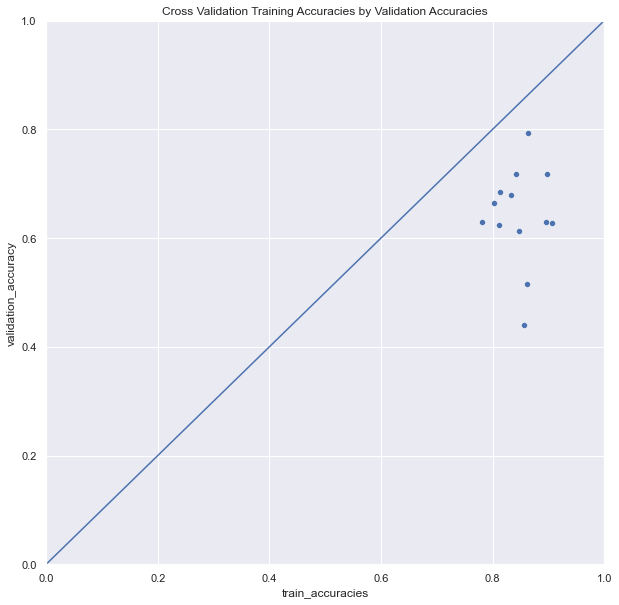

In [43]:
_ = plt.figure(figsize=(10,10))
_ = plt.xlim(0, 1)
_ = plt.ylim(0, 1)
_ = sns.scatterplot(data=model4data, x='train_accuracies', y='validation_accuracy')
_ = plt.plot([0,1], [0,1])
_ = plt.title('Cross Validation Training Accuracies by Validation Accuracies')

Performed pretty well!

# Model 4 with Datagen Preprocessing

In [9]:
def modelbuild():
    model = Sequential()
    model.add(Conv2D(99,
                  kernel_size=11,
                  strides=4,
                  padding='valid',
                  input_shape=(227, 227, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(3,
                         strides=2,
                         padding='valid'))
    model.add(Conv2D(256,
                      kernel_size=5,
                      strides=1,
                      padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(3,
                        strides=2,
                        padding='valid'))
    model.add(Conv2D(384,
                      kernel_size=3,
                      strides=1,
                      padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(384,
                      kernel_size=3,
                      strides=1,
                      padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256,
                      kernel_size=3,
                      strides=1,
                      padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(3,
                         strides=2,
                         padding='valid'))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    opt = Adam(learning_rate=0.00001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [28]:
model5 = modelbuild()

In [29]:
trdgen = ImageDataGenerator(rescale=1./255, samplewise_center=True)
tedgen = ImageDataGenerator(rescale=1./255, samplewise_center=True)

In [30]:
model5data = cvrand(model5, 
                    df,
                    trdgen,
                    tedgen,
                    n_iterations=13,
                    batch_size=16,
                    epochs=50,
                    steps_per_epoch=115,
                    target_size=(227,227),
                    random_state=42,
                    min_delta=0.05,
                    patience=5)

CV iteration 1 of 13
Validation subjects are ['p026' 'p050' 'p002']
Found 18400 validated image filenames belonging to 10 classes.
Found 2400 validated image filenames belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 115 steps, validate for 75 steps
Epoch 1/50
115/115 [==============================] - 32s 279ms/step - loss: 3.1446 - accuracy: 0.1592 - val_loss: 2.3285 - val_accuracy: 0.0862
Epoch 2/50
115/115 [==============================] - 31s 268ms/step - loss: 2.3926 - accuracy: 0.2299 - val_loss: 2.3653 - val_accuracy: 0.1000
Epoch 3/50
115/115 [==============================] - 25s 219ms/step - loss: 2.0153 - accuracy: 0.3185 - val_loss: 2.4402 - val_accuracy: 0.1000
Epoch 4/50
115/115 [==============================] - 29s 256ms/step - loss: 1.7643 - accuracy: 0.3870 - val_loss: 2.3493 - val_accuracy: 0.1187
Epoch 5/50
115/115 [==============================] - 30s 259ms/step - loss: 1.5139 - accuracy: 0.4620 - val_loss: 2.1725 - val_accura

Train for 115 steps, validate for 75 steps
Epoch 1/50
115/115 [==============================] - 25s 218ms/step - loss: 3.2622 - accuracy: 0.1451 - val_loss: 2.3163 - val_accuracy: 0.1117
Epoch 2/50
115/115 [==============================] - 25s 217ms/step - loss: 2.2547 - accuracy: 0.2402 - val_loss: 2.3370 - val_accuracy: 0.1412
Epoch 3/50
115/115 [==============================] - 25s 218ms/step - loss: 1.9191 - accuracy: 0.3223 - val_loss: 2.2603 - val_accuracy: 0.1954
Epoch 4/50
115/115 [==============================] - 25s 217ms/step - loss: 1.6052 - accuracy: 0.4250 - val_loss: 2.1033 - val_accuracy: 0.2650
Epoch 5/50
115/115 [==============================] - 25s 218ms/step - loss: 1.4385 - accuracy: 0.4815 - val_loss: 1.8048 - val_accuracy: 0.3604
Epoch 6/50
115/115 [==============================] - 25s 217ms/step - loss: 1.2525 - accuracy: 0.5511 - val_loss: 1.5580 - val_accuracy: 0.4725
Epoch 7/50
115/115 [==============================] - 25s 218ms/step - loss: 1.0754 - a

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 115 steps, validate for 75 steps
Epoch 1/50
115/115 [==============================] - 25s 219ms/step - loss: 3.2646 - accuracy: 0.1592 - val_loss: 2.3020 - val_accuracy: 0.1437
Epoch 2/50
115/115 [==============================] - 25s 220ms/step - loss: 2.3459 - accuracy: 0.2266 - val_loss: 2.2950 - val_accuracy: 0.1329
Epoch 3/50
115/115 [==============================] - 25s 220ms/step - loss: 1.8995 - accuracy: 0.3266 - val_loss: 2.2052 - val_accuracy: 0.1892
Epoch 4/50
115/115 [==============================] - 25s 221ms/step - loss: 1.7151 - accuracy: 0.3995 - val_loss: 2.0281 - val_accuracy: 0.2338
Epoch 5/50
115/115 [==============================] - 25s 220ms/step - loss: 1.5207 - accuracy: 0.4739 - val_loss: 1.5461 - val_accuracy: 0.4654
Epoch 6/50
115/115 [==============================] - 25s 220ms/step - loss: 1.3150 - accuracy: 0.5277 - val_loss: 1.4238 - val_accuracy: 0.4721
Epoch 7/50
115/115 [=================

Epoch 9/50
115/115 [==============================] - 25s 219ms/step - loss: 0.8813 - accuracy: 0.7054 - val_loss: 1.1267 - val_accuracy: 0.5592
Epoch 10/50
115/115 [==============================] - 25s 219ms/step - loss: 0.7574 - accuracy: 0.7565 - val_loss: 1.1068 - val_accuracy: 0.6000
Epoch 11/50
115/115 [==============================] - 26s 222ms/step - loss: 0.6360 - accuracy: 0.8065 - val_loss: 0.9667 - val_accuracy: 0.7017
Epoch 12/50
115/115 [==============================] - 25s 222ms/step - loss: 0.5671 - accuracy: 0.8250 - val_loss: 0.9367 - val_accuracy: 0.6850
Epoch 13/50
115/115 [==============================] - 25s 220ms/step - loss: 0.4875 - accuracy: 0.8707 - val_loss: 0.9492 - val_accuracy: 0.6858
Epoch 14/50
115/115 [==============================] - 25s 219ms/step - loss: 0.4599 - accuracy: 0.8571 - val_loss: 0.9987 - val_accuracy: 0.6662
Epoch 15/50
115/115 [==============================] - 25s 220ms/step - loss: 0.3799 - accuracy: 0.8935 - val_loss: 1.0685 - 

In [31]:
model5data

,validation_subjects,train_accuracies,validation_accuracy
0,"[p026, p050, p002]",0.882,0.454
1,"[p052, p039, p024]",0.749,0.650
2,"[p049, p064, p042]",0.860,0.720
3,"[p051, p066, p014]",0.932,0.610
4,"[p021, p045, p056]",0.924,0.639
5,"[p042, p050, p049]",0.873,0.539
6,"[p002, p049, p045]",0.724,0.613
7,"[p061, p012, p041]",0.939,0.657
8,"[p026, p049, p015]",0.846,0.652
9,"[p052, p045, p051]",0.652,0.734


In [44]:
model5data.to_csv('../metrics/model5metrics.csv', index=False)

# Model with additional Datagen Preprocessing

In [9]:
model6 = modelbuild()

In [10]:
trdgen = ImageDataGenerator(samplewise_center=True,
                            rescale=1./255,
                            rotation_range=10,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            brightness_range=[0.8, 1.2])

tedgen = ImageDataGenerator(samplewise_center=True,
                            rescale=1./255)

In [13]:
%%time
model6data = cvrand(model6, 
                    df,
                    trdgen,
                    tedgen,
                    n_iterations=13,
                    batch_size=16,
                    epochs=50,
                    steps_per_epoch=115,
                    target_size=(227,227),
                    random_state=42,
                    min_delta=0.05,
                    patience=7)

CV iteration 1 of 13
Validation subjects are ['p026' 'p050' 'p002']
Found 18400 validated image filenames belonging to 10 classes.
Found 2400 validated image filenames belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 115 steps, validate for 75 steps
Epoch 1/50
115/115 [==============================] - 58s 502ms/step - loss: 3.4176 - accuracy: 0.1163 - val_loss: 2.3143 - val_accuracy: 0.0996
Epoch 2/50
115/115 [==============================] - 51s 444ms/step - loss: 2.6676 - accuracy: 0.1598 - val_loss: 2.3292 - val_accuracy: 0.1000
Epoch 3/50
115/115 [==============================] - 46s 397ms/step - loss: 2.2938 - accuracy: 0.2120 - val_loss: 2.3639 - val_accuracy: 0.0933
Epoch 4/50
115/115 [==============================] - 52s 453ms/step - loss: 2.1096 - accuracy: 0.2614 - val_loss: 2.2583 - val_accuracy: 0.1408
Epoch 5/50
115/115 [==============================] - 51s 444ms/step - loss: 1.9489 - accuracy: 0.3147 - val_loss: 2.1674 - val_accura

115/115 [==============================] - 45s 395ms/step - loss: 1.5684 - accuracy: 0.4217 - val_loss: 1.2864 - val_accuracy: 0.5612
Epoch 9/50
115/115 [==============================] - 45s 395ms/step - loss: 1.4349 - accuracy: 0.4842 - val_loss: 1.2283 - val_accuracy: 0.5913
Epoch 10/50
115/115 [==============================] - 45s 395ms/step - loss: 1.3958 - accuracy: 0.4946 - val_loss: 1.2058 - val_accuracy: 0.6050
Epoch 11/50
115/115 [==============================] - 45s 395ms/step - loss: 1.2498 - accuracy: 0.5467 - val_loss: 1.1141 - val_accuracy: 0.5992
Epoch 12/50
115/115 [==============================] - 45s 395ms/step - loss: 1.2401 - accuracy: 0.5440 - val_loss: 1.0775 - val_accuracy: 0.6025
Epoch 13/50
115/115 [==============================] - 45s 395ms/step - loss: 1.1186 - accuracy: 0.5984 - val_loss: 1.0112 - val_accuracy: 0.6179
Epoch 14/50
115/115 [==============================] - 47s 405ms/step - loss: 1.0786 - accuracy: 0.6196 - val_loss: 0.9581 - val_accuracy

Epoch 15/50
115/115 [==============================] - 46s 400ms/step - loss: 0.9914 - accuracy: 0.6489 - val_loss: 1.2278 - val_accuracy: 0.6158
Epoch 16/50
115/115 [==============================] - 46s 399ms/step - loss: 0.9614 - accuracy: 0.6598 - val_loss: 1.0784 - val_accuracy: 0.6392
Epoch 17/50
115/115 [==============================] - 46s 398ms/step - loss: 0.8683 - accuracy: 0.6967 - val_loss: 1.0476 - val_accuracy: 0.6463
Epoch 18/50
115/115 [==============================] - 46s 399ms/step - loss: 0.8498 - accuracy: 0.7027 - val_loss: 0.9932 - val_accuracy: 0.6496
Epoch 19/50
115/115 [==============================] - 47s 412ms/step - loss: 0.7614 - accuracy: 0.7337 - val_loss: 1.0750 - val_accuracy: 0.6517
CV iteration 6 of 13
Validation subjects are ['p042' 'p050' 'p049']
Found 18400 validated image filenames belonging to 10 classes.
Found 2400 validated image filenames belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 115 steps, valida

115/115 [==============================] - 46s 403ms/step - loss: 1.4565 - accuracy: 0.4620 - val_loss: 1.6227 - val_accuracy: 0.4800
Epoch 10/50
115/115 [==============================] - 46s 404ms/step - loss: 1.3466 - accuracy: 0.5179 - val_loss: 1.5848 - val_accuracy: 0.4396
Epoch 11/50
115/115 [==============================] - 46s 403ms/step - loss: 1.2740 - accuracy: 0.5576 - val_loss: 1.5422 - val_accuracy: 0.5104
Epoch 12/50
115/115 [==============================] - 46s 403ms/step - loss: 1.2316 - accuracy: 0.5527 - val_loss: 1.6608 - val_accuracy: 0.4696
Epoch 13/50
115/115 [==============================] - 46s 403ms/step - loss: 1.0926 - accuracy: 0.6332 - val_loss: 1.5348 - val_accuracy: 0.5267
Epoch 14/50
115/115 [==============================] - 46s 403ms/step - loss: 1.0081 - accuracy: 0.6451 - val_loss: 1.6504 - val_accuracy: 0.5333
Epoch 15/50
115/115 [==============================] - 46s 404ms/step - loss: 0.9282 - accuracy: 0.6783 - val_loss: 1.4414 - val_accurac

CV iteration 11 of 13
Validation subjects are ['p045' 'p021' 'p016']
Found 18400 validated image filenames belonging to 10 classes.
Found 2400 validated image filenames belonging to 10 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 115 steps, validate for 75 steps
Epoch 1/50
115/115 [==============================] - 46s 401ms/step - loss: 3.5685 - accuracy: 0.1163 - val_loss: 2.3093 - val_accuracy: 0.1000
Epoch 2/50
115/115 [==============================] - 46s 402ms/step - loss: 2.5282 - accuracy: 0.1603 - val_loss: 2.3249 - val_accuracy: 0.1033
Epoch 3/50
115/115 [==============================] - 46s 401ms/step - loss: 2.1885 - accuracy: 0.2245 - val_loss: 2.3209 - val_accuracy: 0.1000
Epoch 4/50
115/115 [==============================] - 46s 401ms/step - loss: 2.0664 - accuracy: 0.2614 - val_loss: 2.1440 - val_accuracy: 0.1242
Epoch 5/50
115/115 [==============================] - 46s 400ms/step - loss: 1.9253 - accuracy: 0.2957 - val_loss: 1.7808 - val_accur

115/115 [==============================] - 46s 399ms/step - loss: 1.3107 - accuracy: 0.5272 - val_loss: 1.0641 - val_accuracy: 0.6767
Epoch 11/50
115/115 [==============================] - 46s 400ms/step - loss: 1.2967 - accuracy: 0.5391 - val_loss: 1.1284 - val_accuracy: 0.6400
Epoch 12/50
115/115 [==============================] - 46s 399ms/step - loss: 1.2049 - accuracy: 0.5663 - val_loss: 1.0275 - val_accuracy: 0.6375
Epoch 13/50
115/115 [==============================] - 46s 399ms/step - loss: 1.1675 - accuracy: 0.5870 - val_loss: 0.9996 - val_accuracy: 0.6275
Epoch 14/50
115/115 [==============================] - 51s 445ms/step - loss: 1.0341 - accuracy: 0.6446 - val_loss: 0.8655 - val_accuracy: 0.7425
Epoch 15/50
115/115 [==============================] - 46s 400ms/step - loss: 0.9888 - accuracy: 0.6380 - val_loss: 0.9239 - val_accuracy: 0.7029
Epoch 16/50
115/115 [==============================] - 46s 400ms/step - loss: 0.9405 - accuracy: 0.6717 - val_loss: 0.9919 - val_accurac

In [14]:
model6data

,validation_subjects,train_accuracies,validation_accuracy
0,"[p026, p050, p002]",0.662,0.414
1,"[p052, p039, p024]",0.774,0.692
2,"[p049, p064, p042]",0.723,0.729
3,"[p051, p066, p014]",0.801,0.721
4,"[p021, p045, p056]",0.626,0.678
5,"[p042, p050, p049]",0.722,0.566
6,"[p002, p049, p045]",0.635,0.572
7,"[p061, p012, p041]",0.678,0.589
8,"[p026, p049, p015]",0.831,0.729
9,"[p052, p045, p051]",0.485,0.691


In [15]:
model6data.to_csv('../metrics/model6metrics.csv', index=False)

In [16]:
notify.send('completed model 6 fitting')

Picking the train/validation set that had the highest accuracies that were closest to one another. Looks like validation set = p021, p061, p042. 

Let's fit just that one and then save the best coefficients.

## Labeled Test Validation

In [10]:
dftrain = df
test_path = 'C:/Users/Dylan/Desktop/Data Science/Projects/DistractedDrivers/data/raw/imgs/testlabeled'

In [11]:
final_model = modelbuild()

In [12]:
# preprocessing
train_dgen = ImageDataGenerator(samplewise_center=True,
                                rescale=1./255,
                                rotation_range=10,
                                width_shift_range=0.05,
                                height_shift_range=0.05,
                                brightness_range=[0.8, 1.2])

test_dgen = ImageDataGenerator(samplewise_center=True,
                              rescale=1./255)

In [13]:
train = train_dgen.flow_from_dataframe(dftrain,
                                       x_col='imgpath',
                                       y_col='classname',
                                       batch_size=16, 
                                       target_size=(227,227),
                                       random_state=42)

test = test_dgen.flow_from_directory(test_path,
                                   target_size=(227,227),
                                   seed=42)

Found 20800 validated image filenames belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [14]:
# Designate model checkpoint and callbacks_list
checkpoint = ModelCheckpoint('weights.hdf5',
                              mode='max',
                              monitor='val_accuracy',
                              save_best_only=True)

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.025, patience=5)

callbacks_list = [checkpoint, earlystop]

In [15]:
final_model.fit(train,
          epochs=50,
          steps_per_epoch=115,
          validation_data=test,
          callbacks=callbacks_list)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 115 steps, validate for 7 steps
Epoch 1/50
115/115 [==============================] - 48s 417ms/step - loss: 3.3559 - accuracy: 0.1245 - val_loss: 2.3228 - val_accuracy: 0.1000
Epoch 2/50
115/115 [==============================] - 43s 374ms/step - loss: 2.6416 - accuracy: 0.1571 - val_loss: 2.3403 - val_accuracy: 0.1050
Epoch 3/50
115/115 [==============================] - 42s 365ms/step - loss: 2.3353 - accuracy: 0.2125 - val_loss: 2.3215 - val_accuracy: 0.1200
Epoch 4/50
115/115 [==============================] - 40s 352ms/step - loss: 2.1420 - accuracy: 0.2587 - val_loss: 2.2003 - val_accuracy: 0.1950
Epoch 5/50
115/115 [==============================] - 42s 363ms/step - loss: 2.0103 - accuracy: 0.2853 - val_loss: 1.9161 - val_accuracy: 0.3300
Epoch 6/50
115/115 [==============================] - 42s 368ms/step - loss: 1.8697 - accuracy: 0.3451 - val_loss: 1.7981 - val_accuracy: 0.3500
Epoch 7/50
115/115 [==================